In [1]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew,kurtosis,zscore

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'Data.zip',
 'Data_Test.xlsx',
 'Data_Train.xlsx',
 'Notebook.ipynb',
 'PredictBookPrice.ipynb',
 'README.md',
 'Sample_Submission.xlsx']

In [3]:
train=pd.read_excel(r"Data_Train.xlsx")
test=pd.read_excel(r"Data_Test.xlsx")

In [4]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
test.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance


### FEATURES:

* Title: The title of the book
* Author: The author(s) of the book.
* Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018)
* Reviews: The customer reviews about the book
* Ratings: The customer ratings of the book
* Synopsis: The synopsis of the book
* Genre: The genre the book belongs to
* BookCategory: The department the book is usually available at.
* Price: The price of the book (Target variable)

In [6]:
def unique_cat(df):
    for i in df.columns:
        print(i)
        print("Total unique categories:" + str(df[i].nunique()))
        print("Unique Categories:" + str(df[i].unique())+ "\n")
        print("________________________________________________________________________________")

In [7]:
unique_cat(train)

Title
Total unique categories:5568
Unique Categories:["The Prisoner's Gold (The Hunters 3)"
 'Guru Dutt: A Tragedy in Three Acts' 'Leviathan (Penguin Classics)' ...
 'The Duke And I: Number 1 in series (Bridgerton Family)'
 'Frostfire (Kanin Chronicles)' 'The First Order (Sam Capra)']

________________________________________________________________________________
Author
Total unique categories:3679
Unique Categories:['Chris Kuzneski' 'Arun Khopkar' 'Thomas Hobbes' ... 'Saba Naqvi'
 'Tom Phillips' 'Stephenie Meyer']

________________________________________________________________________________
Edition
Total unique categories:3370
Unique Categories:['Paperback,– 10 Mar 2016' 'Paperback,– 7 Nov 2012'
 'Paperback,– 25 Feb 1982' ... 'Paperback,– 26 Sep 2006'
 'Paperback,– 21 Nov 2016' 'Paperback,– 15 Jan 2015']

________________________________________________________________________________
Reviews
Total unique categories:36
Unique Categories:['4.0 out of 5 stars' '3.9 out of 5 stars'

In [8]:
unique_cat(test)

Title
Total unique categories:1521
Unique Categories:['The Complete Sherlock Holmes: 2 Boxes sets'
 'Learn Docker - Fundamentals of Docker 18.x: Everything you need to know about containerizing your applications and running them in production'
 'Big Girl' ... 'The Kite Runner Graphic Novel'
 'Panzer Leader (Penguin World War II Collection)'
 'Complete Spanish Step-by-Step']

________________________________________________________________________________
Author
Total unique categories:1224
Unique Categories:['Sir Arthur Conan Doyle' 'Gabriel N. Schenker' 'Danielle Steel' ...
 'ARUN SAGAR' 'Khaled Hosseini' 'Heinz Guderian']

________________________________________________________________________________
Edition
Total unique categories:1259
Unique Categories:['Mass Market Paperback,– 1 Oct 1986' 'Paperback,– Import, 26 Apr 2018'
 'Paperback,– 17 Mar 2011' ... 'Paperback,– 14 Apr 2011'
 'Paperback,– 8 May 2013' 'Paperback,– 16 Sep 2016']

________________________________________________

In [9]:
def missing_function(df):
    nul=[]
    c=[]
    b=[]
    for i in df.columns:
        a=(df[i].isnull().sum()/df.shape[0])*100
        nul.append(a)
    for j in range(0,len(nul)):
         if nul[j]>0:
                c.append(df.columns[j])
                b.append(nul[j])
    nul_tab=pd.DataFrame({"Colum_ name":c,
                 "Null_Data_%":b})
    return nul_tab

In [10]:
missing_function(train)

,Colum_ name,Null_Data_%


In [11]:
missing_function(test)

,Colum_ name,Null_Data_%


In [12]:
train[["Type_of_book","d/t"]]=train["Edition"].str.split(",–",1,expand=True)
test[["Type_of_book","d/t"]]=test["Edition"].str.split(",–",1,expand=True)

In [13]:
train["Type_of_book"].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Product Bundle', 'Library Binding',
       '(German),Paperback', 'Leather Bound', '(French),Paperback',
       '(Spanish),Paperback'], dtype=object)

In [14]:
test["Type_of_book"].unique()

array(['Mass Market Paperback', 'Paperback', 'Hardcover', 'Cards',
       'Sheet music', 'Flexibound', 'Spiral-bound', '(Chinese),Paperback',
       'Loose Leaf'], dtype=object)

In [15]:
train[(train["Type_of_book"]=='(Kannada),Paperback') | (train["Type_of_book"]=='(German),Paperback') | (train["Type_of_book"]=='(Spanish),Paperback') | (train["Type_of_book"]=='(French),Paperback')]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Type_of_book,d/t
2338,English Speaking Course,"Gupta, R.K","(Kannada),Paperback,– 2014",4.2 out of 5 stars,53 customer reviews,Product Dimensions: 9.4 x 7.2 x 0.7 inches Des...,Language Learning & Teaching (Books),"Language, Linguistics & Writing",93.0,"(Kannada),Paperback",2014
3291,Learn German With Stories: Momente in München:...,André Klein,"(German),Paperback,– 17 Nov 2014",5.0 out of 5 stars,2 customer reviews,"In this sequel to ""Karneval in Köln,"" Dino is ...",German,"Language, Linguistics & Writing",557.0,"(German),Paperback",17 Nov 2014
5180,Larousse Student Dictionary French-English/Eng...,Larousse,"(French),Paperback,– 31 Oct 2010",5.0 out of 5 stars,1 customer review,The Larousse Student Dictionary is designed sp...,Dictionaries,"Language, Linguistics & Writing",657.0,"(French),Paperback",31 Oct 2010
5866,Collins Easy Learning – Collins Easy Learning ...,Collins,"(Spanish),Paperback,– Import, 7 Jun 2012",5.0 out of 5 stars,4 customer reviews,Designed to accompany the widely acclaimed Col...,Children's Language Learning (Books),"Language, Linguistics & Writing",295.0,"(Spanish),Paperback","Import, 7 Jun 2012"


In [16]:
train["Type_of_book"][(train["Type_of_book"]=='(Kannada),Paperback') | (train["Type_of_book"]=='(German),Paperback') | (train["Type_of_book"]=='(Spanish),Paperback') | (train["Type_of_book"]=='(French),Paperback')]="Paperback"
test["Type_of_book"][(test["Type_of_book"]=='(Kannada),Paperback') | (test["Type_of_book"]=='(German),Paperback') | (test["Type_of_book"]=='(Spanish),Paperback') | (test["Type_of_book"]=='(French),Paperback') | (test["Type_of_book"]=='(Chinese),Paperback')]="Paperback"

In [17]:
train["Type_of_book"].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

In [18]:
test["Type_of_book"].unique()

array(['Mass Market Paperback', 'Paperback', 'Hardcover', 'Cards',
       'Sheet music', 'Flexibound', 'Spiral-bound', 'Loose Leaf'],
      dtype=object)

In [19]:
train['Edition_Year'] = train['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
test['Edition_Year'] = test['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')

In [20]:
train.drop(columns=["d/t","Edition"],inplace=True)
test.drop(columns=["d/t","Edition"],inplace=True)

In [21]:
train["Reviews"]=train["Reviews"].apply(lambda x: float(x.split()[0]))
test["Reviews"]=test["Reviews"].apply(lambda x: float(x.split()[0]))

In [22]:
train["Ratings"]=train["Ratings"].apply(lambda x: (x.split()[0].replace(",",""))).astype(int)
test["Ratings"]=test["Ratings"].apply(lambda x: (x.split()[0].replace(",",""))).astype(int)

In [23]:
train["Genre"]=train["Genre"].apply(lambda x: x.strip('Textbooks').strip('(Books)'))
test["Genre"]=test["Genre"].apply(lambda x: x.strip('Textbooks').strip('(Books)'))

In [24]:
def to_lower(df,cols):
    for col in cols:
        df[col] = df[col].str.lower()

In [25]:
cols = ['Title','Author','Synopsis','Genre','BookCategory',"Type_of_book"]

#train dataset
to_lower(train,cols)
#teset dataset
to_lower(test,cols)

In [26]:
train.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Type_of_book,Edition_Year
0,the prisoner's gold (the hunters 3),chris kuzneski,4.0,8,the hunters return in their third brilliant no...,action & adventure,action & adventure,220.00,paperback,2016
1,guru dutt: a tragedy in three acts,arun khopkar,3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",202.93,paperback,2012
2,leviathan (penguin classics),thomas hobbes,4.8,6,"""during the time men live without a common pow...",international relation,humour,299.00,paperback,1982
3,a pocket full of rye (miss marple),agatha christie,4.1,13,a handful of grain is found in the pocket of a...,contemporary fiction,"crime, thriller & mystery",180.00,paperback,2017
4,life 70 years of extraordinary photography,editors of life,5.0,1,"for seven decades, ""life"" has been thrilling t...",photography,"arts, film & photography",965.62,hardcover,2006


In [27]:
train.drop(columns=['Synopsis','Title'],inplace=True)
test.drop(columns=['Synopsis','Title'],inplace=True)

In [28]:
test.head()

,Author,Reviews,Ratings,Genre,BookCategory,Type_of_book,Edition_Year
0,sir arthur conan doyle,4.4,960,short stories,"crime, thriller & mystery",mass market paperback,1986
1,gabriel n. schenker,5.0,1,operating systems,"computing, internet & digital media",paperback,2018
2,danielle steel,5.0,4,romance,romance,paperback,2011
3,allen b. downey,4.1,11,programming & software development,"computing, internet & digital media",paperback,2016
4,redman gairns,4.4,9,linguistics,"language, linguistics & writing",paperback,2011


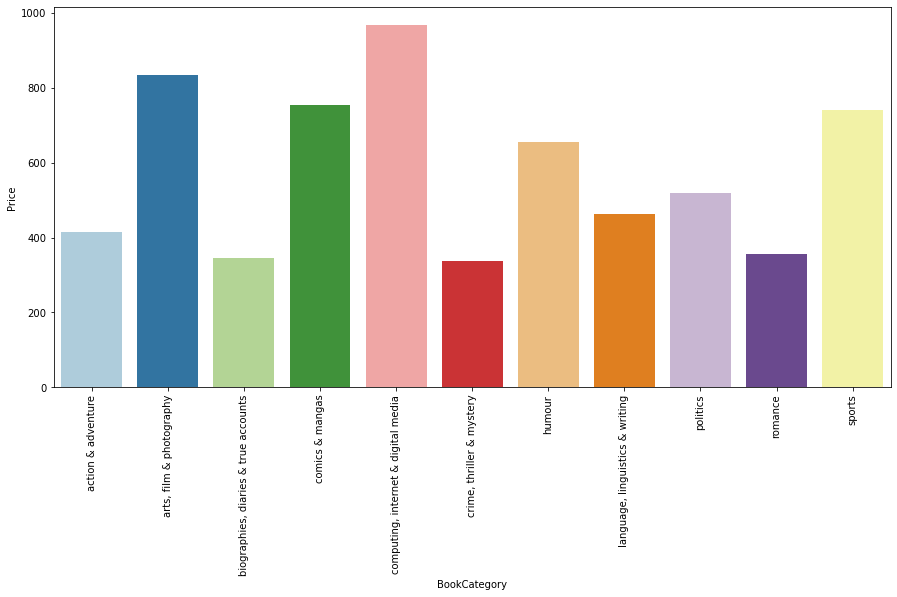

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(data=train,
            x='BookCategory',y='Price',
            palette='Paired',ci=None, 
            order=sorted(train['BookCategory'].unique()),hue=None)
plt.xticks(rotation=90)
plt.show()

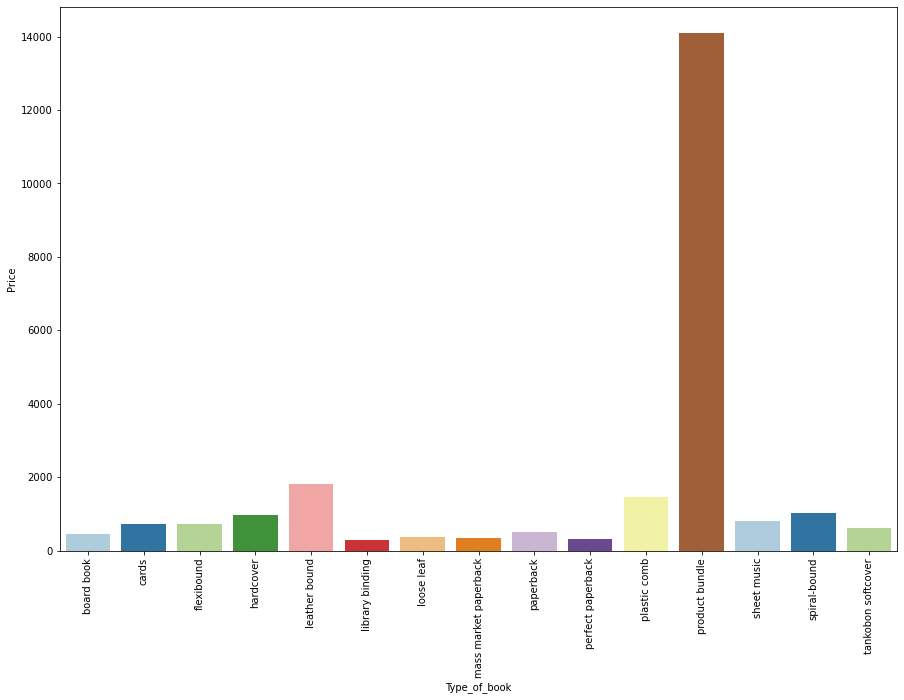

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(data=train,
            x='Type_of_book',y='Price',
            palette='Paired',ci=None, 
            order=sorted(train['Type_of_book'].unique()),hue=None)
plt.xticks(rotation=90)
plt.show()

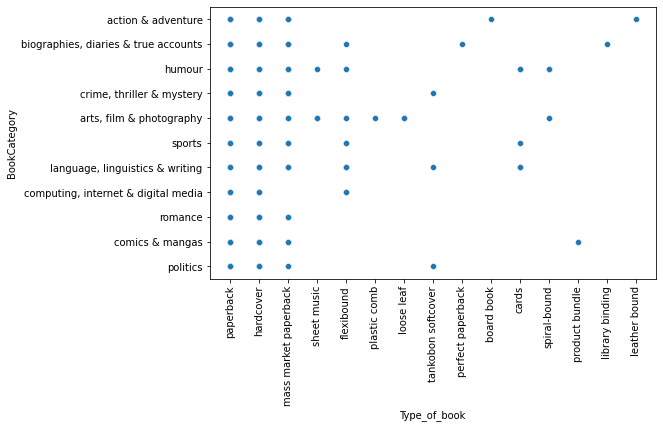

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train,
            x='Type_of_book',y='BookCategory',
            palette='Paired')
plt.xticks(rotation=90)
plt.show()

In [32]:
def distribution_check(df,Cols):
    plt.figure(figsize=(25,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1
        

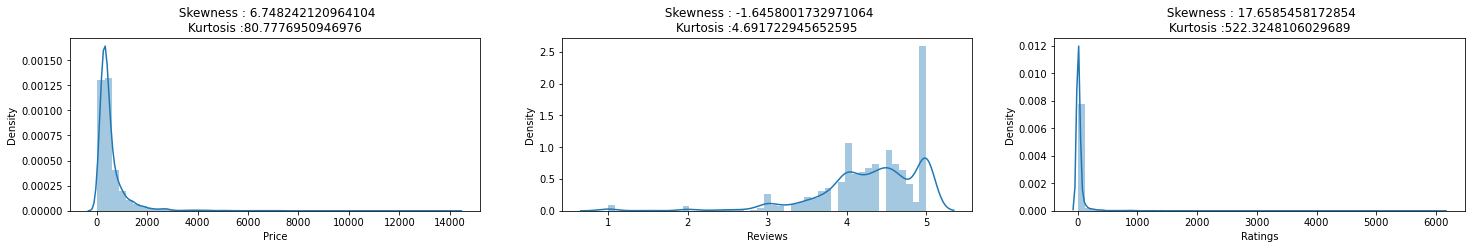

In [33]:
distribution_check(train,['Price','Reviews','Ratings'])

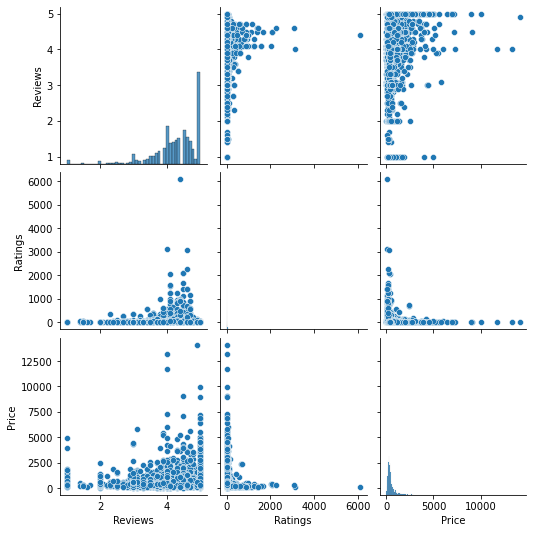

In [34]:
sns.pairplot(train)
plt.show()

<AxesSubplot:>

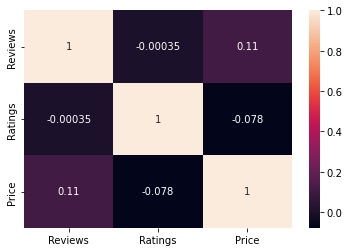

In [35]:
sns.heatmap(train.corr(),annot=True)

In [36]:
power = PowerTransformer()
train[['Reviews']] = power.fit_transform(train[['Reviews']])
train[['Ratings']] = power.fit_transform(train[['Ratings']])
train[['Price']] = power.fit_transform(train[['Price']])

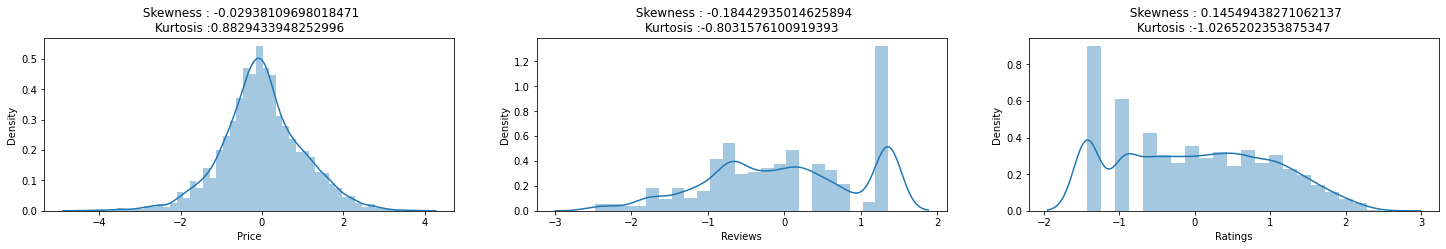

In [37]:
distribution_check(train,['Price','Reviews','Ratings'])

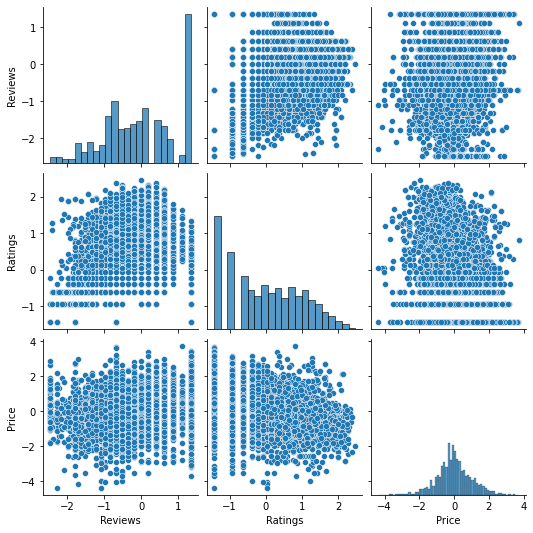

In [38]:
sns.pairplot(train)
plt.show()

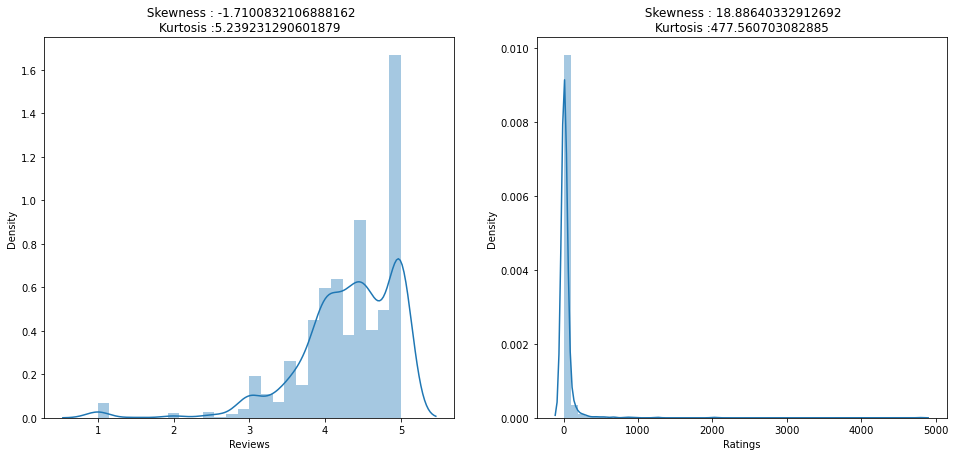

In [39]:
distribution_check(test,['Reviews','Ratings'])

In [40]:
test[['Reviews']] = power.transform(test[['Reviews']])
test[['Ratings']] = power.transform(test[['Ratings']])

In [41]:
test.head(3)

,Author,Reviews,Ratings,Genre,BookCategory,Type_of_book,Edition_Year
0,sir arthur conan doyle,-7.825036,1.143953,short stories,"crime, thriller & mystery",mass market paperback,1986
1,gabriel n. schenker,-7.569108,-10.436161,operating systems,"computing, internet & digital media",paperback,2018
2,danielle steel,-7.569108,-8.014421,romance,romance,paperback,2011


In [42]:
train.head(3)

,Author,Reviews,Ratings,Genre,BookCategory,Price,Type_of_book,Edition_Year
0,chris kuzneski,-0.688861,0.138231,action & adventure,action & adventure,-0.769233,paperback,2016
1,arun khopkar,-0.834876,0.526742,cinema & broadcast,"biographies, diaries & true accounts",-0.885866,paperback,2012
2,thomas hobbes,0.853798,-0.076231,international relation,humour,-0.337797,paperback,1982


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Reviews       6237 non-null   float64
 2   Ratings       6237 non-null   float64
 3   Genre         6237 non-null   object 
 4   BookCategory  6237 non-null   object 
 5   Price         6237 non-null   float64
 6   Type_of_book  6237 non-null   object 
 7   Edition_Year  6237 non-null   object 
dtypes: float64(3), object(5)
memory usage: 389.9+ KB


In [44]:
train = train.astype({'Author':'category','Genre':'category','BookCategory':'category','Type_of_book':'category','Edition_Year':'category'})

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Reviews       6237 non-null   float64 
 2   Ratings       6237 non-null   float64 
 3   Genre         6237 non-null   category
 4   BookCategory  6237 non-null   category
 5   Price         6237 non-null   float64 
 6   Type_of_book  6237 non-null   category
 7   Edition_Year  6237 non-null   category
dtypes: category(5), float64(3)
memory usage: 361.0 KB


In [46]:
test = test.astype({'Author':'category','Genre':'category','BookCategory':'category','Type_of_book':'category','Edition_Year':'category'})

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        1560 non-null   category
 1   Reviews       1560 non-null   float64 
 2   Ratings       1560 non-null   float64 
 3   Genre         1560 non-null   category
 4   BookCategory  1560 non-null   category
 5   Type_of_book  1560 non-null   category
 6   Edition_Year  1560 non-null   category
dtypes: category(5), float64(2)
memory usage: 89.0 KB


In [48]:
x=train.drop(columns=["Price"])
y=train["Price"]

In [49]:
df = pd.concat(objs=[x,test],axis=0)

In [50]:
df

,Author,Reviews,Ratings,Genre,BookCategory,Type_of_book,Edition_Year
0,chris kuzneski,-0.688861,0.138231,action & adventure,action & adventure,paperback,2016
1,arun khopkar,-0.834876,0.526742,cinema & broadcast,"biographies, diaries & true accounts",paperback,2012
2,thomas hobbes,0.853798,-0.076231,international relation,humour,paperback,1982
3,agatha christie,-0.533420,0.477727,contemporary fiction,"crime, thriller & mystery",paperback,2017
4,editors of life,1.359627,-1.427835,photography,"arts, film & photography",hardcover,2006
...,...,...,...,...,...,...,...
1555,susan weinschenk,-7.569108,-8.014421,design,"computing, internet & digital media",paperback,2011
1556,arun sagar,-8.221963,-5.644782,children's reference,"biographies, diaries & true accounts",paperback,2013
1557,khaled hosseini,-8.014421,-7.569108,humour,humour,paperback,2011
1558,heinz guderian,-8.277081,-8.575413,united states history,"biographies, diaries & true accounts",paperback,2009


In [51]:
le = LabelEncoder()

df['Author'] = le.fit_transform(df['Author'])
df['Genre'] = le.fit_transform(df['Genre'])
df['BookCategory'] = le.fit_transform(df['BookCategory'])
df['Type_of_book'] = le.fit_transform(df['Type_of_book'])
df['Edition_Year'] = le.fit_transform(df['Edition_Year'])

In [52]:
df.head()

,Author,Reviews,Ratings,Genre,BookCategory,Type_of_book,Edition_Year
0,746,-0.688861,0.138231,2,0,8,54
1,368,-0.834876,0.526742,64,2,8,50
2,4035,0.853798,-0.076231,192,6,8,20
3,75,-0.533420,0.477727,82,5,8,55
4,1132,1.359627,-1.427835,262,1,3,44


In [55]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(df)
df = pd.DataFrame(norm.transform(df),columns=df.columns)

In [53]:
train_size = len(train)

In [58]:
train = df[:train_size]
test = df[train_size:]

In [59]:
train = train.astype({'Author':'int','Genre':'int','BookCategory':'int','Edition_Year':'int'})
test = test.astype({'Author':'int','Genre':'int','BookCategory':'int','Edition_Year':'int'})

In [60]:
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.10,random_state=0)

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(x_train)

In [63]:
print(r2_score(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))
print(mean_absolute_error(y_train, y_pred))
print(np.sqrt(mean_squared_error(y_train, y_pred)))

0.14663435430734217
0.852197214244667
0.6883222828943354
0.9231452833897095


In [64]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
model = RidgeCV(cv=cv, scoring='neg_mean_absolute_error')
model.fit(x_train, y_train)

RidgeCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=0),
        scoring='neg_mean_absolute_error')

In [65]:
y_pred_Rid = model.predict(x_train)

In [66]:
print(r2_score(y_train, y_pred_Rid))
print(mean_squared_error(y_train, y_pred_Rid))
print(mean_absolute_error(y_train, y_pred_Rid))
print(np.sqrt(mean_squared_error(y_train, y_pred_Rid)))

0.14650217787837738
0.8523292096971686
0.6883642537909155
0.9232167728638646
